### Apache Spark Koalas
Este notebook contiene las funciones principales de Koalas, obtenidas de la documentacion oficial https://koalas.readthedocs.io/

In [4]:
# !pip install plotly 

In [2]:
import sys
sys.executable

'C:\\Users\\brjmr\\Anaconda3True\\python.exe'

In [7]:
!pip install koalas

In [9]:
import findspark
findspark.init()

import pandas as pd
import pyspark

import pandas as pd
import numpy as np
import databricks.koalas as ks
from pyspark.sql import SparkSession

### 1.- Creación de objetos

Creando una serie de Koalas pasando una lista de valores, permitiendo que Koalas cree un indice entero predeterminado:

In [11]:
s = ks.Series([1, 3, 5, np.nan, 6, 8])

In [12]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creando un Koalas DataFrame pasando un dict de objetos que se pueden convertir a series

In [13]:
kdf = ks.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ['one', 'two', 'three', 'four', 'five', 'six']},
    index= [10, 20, 30, 40, 50, 60])

In [14]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creando un DataFrame de pandas pasando una matriz de numpy, con un indice de fecha y hora y columnas etiquetadas

In [15]:
dates = pd.date_range('20130101', periods= 6)

In [16]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [17]:
pdf = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [18]:
pdf

,A,B,C,D
2013-01-01,-0.863666,-1.390013,1.229753,1.210435
2013-01-02,0.480436,-0.451059,0.844838,0.037103
2013-01-03,-1.845329,-1.104769,-0.176432,-0.376170
2013-01-04,1.666457,-1.142545,-0.171215,1.893780
2013-01-05,1.537011,-0.757716,0.232242,0.728619
2013-01-06,-0.196739,0.198258,-1.141860,0.447632


Ahora este DAtaFrame de pandas se puede convertir a un DF de Koalas

In [19]:
kdf = ks.from_pandas(pdf)

In [20]:
type(kdf)

databricks.koalas.frame.DataFrame

Sin embargo, se ve y se comporta igual que un DF de pandas

In [21]:
kdf

,A,B,C,D
2013-01-01,-0.863666,-1.390013,1.229753,1.210435
2013-01-02,0.480436,-0.451059,0.844838,0.037103
2013-01-03,-1.845329,-1.104769,-0.176432,-0.376170
2013-01-04,1.666457,-1.142545,-0.171215,1.893780
2013-01-05,1.537011,-0.757716,0.232242,0.728619
2013-01-06,-0.196739,0.198258,-1.141860,0.447632


Además, es posible crear un **Koalas DataFrame desde Spark DataFrame**
Creando un Spark DataFrame a partir de pandas DF

In [22]:
spark = SparkSession.builder.getOrCreate()

In [23]:
sdf = spark.createDataFrame(pdf)

In [24]:
sdf.show()

+--------------------+--------------------+--------------------+-------------------+
|                   A|                   B|                   C|                  D|
+--------------------+--------------------+--------------------+-------------------+
| -0.8636663545169687| -1.3900134680867937|   1.229753472504741| 1.2104350925492848|
| 0.48043648216249746|-0.45105901051164415|  0.8448377801764728|0.03710348427173416|
|  -1.845328585035257| -1.1047686163562542|-0.17643208830535093|-0.3761697055897577|
|  1.6664565652594143| -1.1425445577378186|-0.17121474776275672| 1.8937799158390773|
|   1.537010714785287| -0.7577160770161461| 0.23224208339775582| 0.7286192046616334|
|-0.19673858116225082|   0.198257831947245| -1.1418603022766638|0.44763224092677234|
+--------------------+--------------------+--------------------+-------------------+



Tiene [dtypes] especificos. Actualmente se admiten los tipos que son comunes a Spark y pandas

In [25]:
kdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

### Manipulación de datos

A diferencia de los pandas, los datos de un df de datos Spark no están ordenados, no tienen una noción intrínseca de indice. Cuando se le solicite el encabezado, Spark solo tomará el número solicitado de filas de una partición. **No hay que utilizar el df Koalas para devolver filas especificas**, use `.iloc` o `.loc` en su lugar.

In [26]:
kdf.head()

,A,B,C,D
2013-01-01,-0.863666,-1.390013,1.229753,1.210435
2013-01-02,0.480436,-0.451059,0.844838,0.037103
2013-01-03,-1.845329,-1.104769,-0.176432,-0.376170
2013-01-04,1.666457,-1.142545,-0.171215,1.893780
2013-01-05,1.537011,-0.757716,0.232242,0.728619


Muestre el índice, las columnas y los datos numéricos subyacentes.

También puede recuperar el índice; la columna de indice se puede atribuir a un df, ver más adelante

In [27]:
kdf.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq=None)

In [28]:
kdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [30]:
kdf.to_numpy()

array([[-0.86366635, -1.39001347,  1.22975347,  1.21043509],
       [ 0.48043648, -0.45105901,  0.84483778,  0.03710348],
       [-1.84532859, -1.10476862, -0.17643209, -0.37616971],
       [ 1.66645657, -1.14254456, -0.17121475,  1.89377992],
       [ 1.53701071, -0.75771608,  0.23224208,  0.7286192 ],
       [-0.19673858,  0.19825783, -1.1418603 ,  0.44763224]])

**Describe** muestra un resumen estadístico rápido de sus datos

In [31]:
kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.129695,-0.774641,0.136221,0.656900
std,1.375444,0.578713,0.840587,0.816895
min,-1.845329,-1.390013,-1.141860,-0.376170
25%,-0.863666,-1.142545,-0.176432,0.037103
50%,-0.196739,-1.104769,-0.171215,0.447632
75%,1.537011,-0.451059,0.844838,1.210435
max,1.666457,0.198258,1.229753,1.893780


Transposición de sus datos

In [ ]:
kdf.T

Ordenando por su indice

In [33]:
kdf.sort_index(ascending= False)

,A,B,C,D
2013-01-06,-0.196739,0.198258,-1.141860,0.447632
2013-01-05,1.537011,-0.757716,0.232242,0.728619
2013-01-04,1.666457,-1.142545,-0.171215,1.893780
2013-01-03,-1.845329,-1.104769,-0.176432,-0.376170
2013-01-02,0.480436,-0.451059,0.844838,0.037103
2013-01-01,-0.863666,-1.390013,1.229753,1.210435


Ordenando por su valor

In [34]:
kdf.sort_values(by='B')

,A,B,C,D
2013-01-01,-0.863666,-1.390013,1.229753,1.210435
2013-01-04,1.666457,-1.142545,-0.171215,1.893780
2013-01-03,-1.845329,-1.104769,-0.176432,-0.376170
2013-01-05,1.537011,-0.757716,0.232242,0.728619
2013-01-02,0.480436,-0.451059,0.844838,0.037103
2013-01-06,-0.196739,0.198258,-1.141860,0.447632


### 3.- Datos faltantes

Koalas utiliza principalmente el valor np.nan para presentar los datos faltantes. Por defecto, no se incluye en los cálculos

In [35]:
pdf1 = pdf.reindex(index=dates[0:4], columns = list(pdf.columns) + ['E'])

In [36]:
pdf.loc[dates[0]:dates[1], 'E']= 1

In [37]:
kdf1 = ks.from_pandas(pdf1)

In [38]:
kdf1

,A,B,C,D,E
2013-01-01,-0.863666,-1.390013,1.229753,1.210435,NaN
2013-01-02,0.480436,-0.451059,0.844838,0.037103,NaN
2013-01-03,-1.845329,-1.104769,-0.176432,-0.376170,NaN
2013-01-04,1.666457,-1.142545,-0.171215,1.893780,NaN


Para eliminar las filas que tienen datos faltantes.

In [39]:
kdf1.dropna(how = 'any')

,A,B,C,D,E


Llenando los datos faltantes.

In [41]:
kdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.863666,-1.390013,1.229753,1.210435,5.0
2013-01-02,0.480436,-0.451059,0.844838,0.037103,5.0
2013-01-03,-1.845329,-1.104769,-0.176432,-0.376170,5.0
2013-01-04,1.666457,-1.142545,-0.171215,1.893780,5.0


### 4.- Operaciones

**Estadísticas**

Las operaciones en general excluyen los datos faltantes.
Realización de una estadística descriptiva:

In [42]:
kdf.mean()

A    0.129695
B   -0.774641
C    0.136221
D    0.656900
dtype: float64

#### Configuraciones de Spark

Varias configuraciones en PySpark se pueden aplicar internamente en Koalas. Por ejemplo, puede habilitar la optimización de Arrow para acelerar enormemente la conversión de pandas internos.

In [43]:
prev = spark.conf.get('spark.sql.execution.arrow.enabled') #Keep its default value.
ks.set_option('compute.default_index_type', 'distributed') #Use default index prevent overhead.

import warnings
warnings.filterwarnings('ignore') # Ignore warnings coming from Arrow optimizations

In [44]:
spark.conf.set('spark.sql.execution.arrow.enabled', True)
%timeit ks.range(300000).to_pandas()

135 ms ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
ks.reset_option('compute.default_index_type')
spark.conf.set('spark.sql.execution.arrow_enabled', prev) # set its defult value back

#### Agrupación

Por "agrupar por" nos referimos a un proceso que involucra uno o más de los siguientes pasos:

* Dividir los datos en grupos según algiunos criterios.
* Aplicar una función a cada grupo de forma independiente
* Combinar los resultados en una estructura de datos

In [46]:
kdf = ks.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [47]:
kdf

,A,B,C,D
0,foo,one,0.667736,0.945621
1,bar,one,-0.242909,0.611444
2,foo,two,1.378550,1.469556
3,bar,three,0.644199,0.162650
4,foo,two,0.190472,-0.195270
5,bar,two,-0.294773,-0.146251
6,foo,one,0.546708,0.924203
7,foo,three,-0.541987,-0.950622


Agrupar y luego aplicar el **sum** a los grupos resultantes

In [48]:
kdf.groupby('A').sum()

,C,D
A,,
bar,0.106518,0.627843
foo,2.241478,2.193489


In [49]:
kdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo one    1.214443  1.869825
    two    1.569022  1.274287
bar three  0.644199  0.162650
foo three -0.541987 -0.950622
bar two   -0.294773 -0.146251
    one   -0.242909  0.611444

### Visualización de datos: Generar gráficos

In [50]:
pser= pd.Series(np.random.random(1000),
               index = pd.date_range('1/1/2000', periods = 1000))

In [51]:
kser = ks.Series(pser)

In [52]:
kser = kser.cummax()
kser

2000-01-01    0.878755
2000-01-02    0.878755
2000-01-03    0.895374
2000-01-04    0.895374
2000-01-05    0.895374
2000-01-06    0.895374
2000-01-07    0.895374
2000-01-08    0.998202
2000-01-09    0.998202
2000-01-10    0.998202
2000-01-11    0.998202
2000-01-12    0.998202
2000-01-13    0.998202
2000-01-14    0.998202
2000-01-15    0.998202
2000-01-16    0.998202
2000-01-17    0.998202
2000-01-18    0.998202
2000-01-19    0.998202
2000-01-20    0.998202
2000-01-21    0.998202
2000-01-22    0.998202
2000-01-23    0.998202
2000-01-24    0.998202
2000-01-25    0.998202
2000-01-26    0.998202
2000-01-27    0.998202
2000-01-28    0.998202
2000-01-29    0.998202
2000-01-30    0.998202
2000-01-31    0.998202
2000-02-01    0.998202
2000-02-02    0.998202
2000-02-03    0.998202
2000-02-04    0.998202
2000-02-05    0.998202
2000-02-06    0.998202
2000-02-07    0.998202
2000-02-08    0.998202
2000-02-09    0.998202
2000-02-10    0.998202
2000-02-11    0.998202
2000-02-12    0.998202
2000-02-13 

<AxesSubplot:>

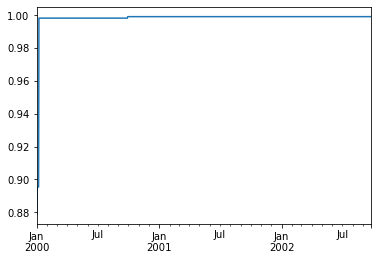

In [53]:
ks.options.plotting.backend = 'matplotlib'
kser.plot()

#### Gráficos de Pandas Bokeh

In [55]:
pip install pandas-bokeh

Note: you may need to restart the kernel to use updated packages.


In [56]:

ks.options.plotting.backend = "pandas_bokeh"

kdf.plot(backend="pandas_bokeh", title="Example Figure")
kser.plot()

Figure(id='1235', ...)

#### Gráfico por defecto con plotly

En un df, el plot() es una conveniencia para trazar todas las columnas con etiquetas:

In [58]:
pdf = pd.DataFrame(np.random.rand(1000, 4), index = pser.index,
                  columns=['A','B','C','D'])

In [59]:
kdf = ks.from_pandas(pdf)

In [60]:
kdf = kdf.cummax()
kdf

,A,B,C,D
2000-01-01,0.649201,0.195835,0.577740,0.514071
2000-01-02,0.649201,0.375971,0.577740,0.522635
2000-01-03,0.924874,0.375971,0.961446,0.522635
2000-01-04,0.924874,0.375971,0.961446,0.522635
2000-01-05,0.924874,0.908867,0.961446,0.732027
2000-01-06,0.924874,0.908867,0.961446,0.732027
2000-01-07,0.924874,0.908867,0.961446,0.732027
2000-01-08,0.924874,0.908867,0.961446,0.732027
2000-01-09,0.924874,0.908867,0.963352,0.732027
2000-01-10,0.924874,0.908867,0.963352,0.732027


In [61]:
kdf.plot()

Figure(id='1925', ...)

### 6.- Entrada / salida de datos

## CSV

CSV es sencillo y fácil de usar

In [ ]:
kdf.